In [2]:
## Import modules to mount google drive and authorize google account
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth, drive
from oauth2client.client import GoogleCredentials
drive.mount('/content/gdrive')

## Import modules
import os   #walk through file and folders
import pandas as pd
import numpy as np
import tensorflow as tf #deep learning
!pip3 install wikipedia-api #install wikipedia api
import wikipediaapi #wikipedia api
from joblib import Parallel, delayed #parallel computing
from tqdm.notebook import tqdm #notebook loading bar
import matplotlib.pyplot as plt
if  os.path.exists('/content/gdrive/My Drive/interest_simple.csv'):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    downloaded = drive.CreateFile({'id':"1l3iGHppTItT2imnxRppAdatul8bfRhos"})   
    downloaded.GetContentFile('Wiki-MID_EN-Table.zip')
    !unzip Wiki-MID_EN-Table.zip
    !cp /content/EN/message-based_dataset.tsv "/content/gdrive/My Drive/"
    !cp /content/EN/message-based_interest_info.tsv "/content/gdrive/My Drive/"
    print('List of flat files exist in data set:')
    !ls "/content/EN"
    root = '/content/EN'
    print('head friend-based_dataset.tsv:')
    !head -10 /content/EN/friend-based_dataset.tsv
    print('head friend-based_interest_info.tsv:')
    !head -10 /content/EN/friend-based_interest_info.tsv
    print('head message-based_dataset.tsv:')
    !head -10 /content/EN/message-based_dataset.tsv
    print('head message-based_interest_info:')
    !head -10 /content/EN/message-based_interest_info.tsv

Mounted at /content/gdrive
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.5.4-cp36-none-any.whl size=13462 sha256=8724921beacd38c687bec3daf157a91ec746fc986340653716d4385823c1ff5b
  Stored in directory: /root/.cache/pip/wheels/bf/40/42/ba1d497f3712281b659dd65b566fc868035c859239571a725a
Successfully built wikipedia-api
Archive:  Wiki-MID_EN-Table.zip
   creating: EN/
  inflating: EN/friend-based_dataset.tsv  
  inflating: EN/friend-based_interest_info.tsv  
  inflating: EN/message-based_dataset.tsv  
  inflating: EN/message-based_interest_info.tsv  
   creating: IT/
  inflating: IT/friend-based_dataset.tsv  
  inflating: IT/friend-based_interest_info.tsv  
  inflating: IT/message-based_dataset.tsv  
  inflating: IT/message-based_interest_info.tsv  
  inflating: README.txt              
List of flat files exist in data set:
friend-based_dataset.tsv	message-based_dataset.tsv
friend-based_interest_info.tsv	message-based_interest_info.tsv
head friend-based_dataset.tsv:
100000647

In [3]:
colnames=['user_id', 'tweet_id', 'interest_id', 'url']  #columns name in message-based_dataset.tsv
message_based_dataset = pd.read_csv(root+'/message-based_dataset.tsv',encoding = 'latin-1',names = colnames, header=None, error_bad_lines=False, delimiter='\t', usecols=colnames[0:-1]) #load message-based_dataset.tsv to csv
message_based_dataset.head()    #quick look at message-based_dataset.tsv

,user_id,tweet_id,interest_id
0,158311655,847669798515257345,0ENI
1,799714254618329088,847670112022700032,1ENI
2,1624748084,847672810965159938,2ENI
3,2968012739,847673144013799425,2ENI
4,64260934,847673873734680576,3ENI


In [4]:
colnames=['interest_id','platform_type','wikipedia_page']   #columns name in message-based_interest_info.tsv
message_based_interest_info = pd.read_csv(root+'/message-based_interest_info.tsv',encoding = 'latin-1',names = colnames, header=None, error_bad_lines=False, delimiter='\t', usecols=[colnames[0], colnames[-1]]) #load message-based_interest_info.tsv to csv
message_based_interest_info.head() #quick look at message-based_interest_info.tsv

,interest_id,wikipedia_page
0,0ENI,WIKI:EN:Elementary_(TV_series)
1,1ENI,WIKI:EN:List_of_The_Fall_characters
2,2ENI,WIKI:EN:Ghost_in_the_Shell_(2017_film)
3,3ENI,WIKI:EN:Empire_(2015_TV_series)
4,4ENI,WIKI:EN:Review_(TV_series)


In [5]:
words = ['tourism','places', 'archeology', 'restaurant', 'world heritage', 'city','cities', 'capital','capitals'] #words refer to interests

In [9]:
def get_categories(pageName, words):
    words_set = set(words)
    try:
        page_py = wiki_wiki.page(pageName)
        category=[]
        categories = set([word.lower() for word in " ".join(list(page_py.categories.keys())).replace(':',' ').split()])
        return words_set.intersection(categories)
    except:
        return set()
def get_matches():
    wiki_wiki = wikipediaapi.Wikipedia('en')
    jobs = []
    for wiki_page in tqdm(message_based_interest_info['wikipedia_page']):
        link = wiki_page.split(':')[-1]
        jobs.append(delayed(get_categories)(pageName=link, words=words))
    chunk_size = 5000    
    chunks = [jobs[chunk_size*i:chunk_size*(i+1)] for i in range(len(jobs)//chunk_size + 1)]
    for i,chunk in enumerate(chunks):
        if not os.path.exists('/content/gdrive/My Drive/chunk_{}.csv'.format(i)):
            matches = Parallel(n_jobs = 8, verbose=1)(chunk)
            pd.DataFrame(data=matches).to_csv('/content/gdrive/My Drive/chunk_{}.csv'.format(i), index=True)
def load_matches():
    chunks_path = [os.path.join('/content/gdrive/My Drive', x) for x in os.listdir('/content/gdrive/My Drive') if x.startswith('chunk_')]
    print('chunks found:', chunks_path, sep='\n')
    matches = pd.DataFrame()
    print('chunks loading: ')
    for chunk_path in tqdm(chunks_path):
        matches = pd.concat([matches, pd.read_csv(chunk_path, index_col=0)])
    return matches

In [10]:
get_matches() #scrap wikipeida pages and find out the categories
matches = load_matches() #load matches


chunks found:
['/content/gdrive/My Drive/chunk_0.csv', '/content/gdrive/My Drive/chunk_1.csv', '/content/gdrive/My Drive/chunk_2.csv', '/content/gdrive/My Drive/chunk_3.csv', '/content/gdrive/My Drive/chunk_4.csv', '/content/gdrive/My Drive/chunk_5.csv', '/content/gdrive/My Drive/chunk_6.csv', '/content/gdrive/My Drive/chunk_7.csv', '/content/gdrive/My Drive/chunk_8.csv', '/content/gdrive/My Drive/chunk_9.csv', '/content/gdrive/My Drive/chunk_10.csv', '/content/gdrive/My Drive/chunk_11.csv', '/content/gdrive/My Drive/chunk_12.csv', '/content/gdrive/My Drive/chunk_13.csv', '/content/gdrive/My Drive/chunk_14.csv', '/content/gdrive/My Drive/chunk_15.csv', '/content/gdrive/My Drive/chunk_16.csv', '/content/gdrive/My Drive/chunk_17.csv', '/content/gdrive/My Drive/chunk_18.csv', '/content/gdrive/My Drive/chunk_19.csv', '/content/gdrive/My Drive/chunk_20.csv', '/content/gdrive/My Drive/chunk_21.csv', '/content/gdrive/My Drive/chunk_22.csv', '/content/gdrive/My Drive/chunk_23.csv', '/content/

In [11]:
#only take into the account if there exist at least a targetet words in the categories
is_matches = np.apply_along_axis(lambda a: (sum([type(x)==str for x in a]) > 0)*1, axis=1, arr=matches.values)

In [8]:
message_based_interest_info['is_matches'] = is_matches

In [9]:
message_based_interest_info_filtered = message_based_interest_info[message_based_interest_info['is_matches'] > 0]
print('There are {} records representing user-interests'.format(message_based_interest_info_filtered.shape[0]))

There are 11881 records representing user-interests


In [10]:
#integerating user and interest data
integrated_dataset = pd.merge(left=message_based_interest_info_filtered, right=message_based_dataset, how='left', left_on='interest_id', right_on='interest_id')
integrated_dataset.drop(columns=['wikipedia_page', 'tweet_id'], inplace=True)

In [11]:
integrated_dataset.head()

,interest_id,is_matches,user_id
0,0ENI,1,158311655
1,0ENI,1,158311655
2,0ENI,1,556869540
3,0ENI,1,556869540
4,0ENI,1,556869540


In [12]:
#filtering less distributed users and interests in data
user_threshold = 5
interest_threshold = 30
users_info = integrated_dataset.groupby(by='user_id').count().reset_index()[['user_id','is_matches']]
users_info.columns = ['user_id','user_count']
interest_info = integrated_dataset.groupby(by='interest_id').count().reset_index()[['interest_id','is_matches']]
interest_info.columns = ['interest_id','interest_count']
integrated_dataset_info = pd.merge(left=integrated_dataset, right=users_info, how='left', left_on='user_id', right_on='user_id')
integrated_dataset_info = pd.merge(left=integrated_dataset_info, right=interest_info, how='left', left_on='interest_id', right_on='interest_id')
integrated_dataset_info = integrated_dataset_info[(integrated_dataset_info['user_count'] > user_threshold) | (integrated_dataset_info['interest_count'] > interest_threshold)]
integrated_dataset_info

,interest_id,is_matches,user_id,user_count,interest_count
0,0ENI,1,158311655,89,30
1,0ENI,1,158311655,89,30
2,0ENI,1,556869540,20,30
3,0ENI,1,556869540,20,30
4,0ENI,1,556869540,20,30
...,...,...,...,...,...
49404,20457ENG,1,35825952,39,1
49407,20478ENG,1,35825952,39,2
49410,20506ENG,1,1969295354,8,2
49411,20506ENG,1,1549079918,10,2


In [13]:
pivot = pd.pivot_table(data = integrated_dataset_info, values='is_matches', index = 'user_id', columns='interest_id', aggfunc='mean', fill_value=0)

In [14]:
pivot

interest_id,0ENI,100047ENS,100153ENS,100205ENS,100272ENS,1002ENI,100321ENS,100366ENS,100387ENS,100394ENS,100400ENS,100402ENS,100570ENS,100607ENS,100610ENS,100625ENS,100647ENS,100681ENS,100685ENS,100728ENS,100731ENS,100733ENS,100737ENS,100778ENS,100786ENS,100809ENS,100858ENS,100938ENS,100988ENS,10100ENS,101026ENS,101041ENS,101059ENS,101066ENS,101068ENS,101069ENS,101100ENS,101124ENS,10116ENS,1011ENG,...,98230ENS,98232ENS,98286ENS,98296ENS,98304ENS,98353ENS,9837ENS,98434ENS,98446ENS,98472ENS,98487ENS,9855ENS,98565ENS,98579ENS,98603ENS,98689ENS,98729ENS,98737ENS,98819ENS,98843ENS,98890ENS,98935ENS,9893ENG,99037ENS,99256ENS,99281ENS,99443ENS,99492ENS,99502ENS,99508ENS,99526ENS,99542ENS,99618ENS,99631ENS,9968ENG,99710ENS,998ENI,99912ENS,99943ENS,99947ENS
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
620953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
719203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
754714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907436531392110594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
907443088104202240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908028249334272001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
if not os.path.exists('/content/gdrive/My Drive/pivot.csv'):
    pivot.to_csv('/content/gdrive/My Drive/pivot.csv'); 
else:
    pivot = pd.read_csv('/content/gdrive/My Drive/pivot.csv', index_col=0);

In [16]:
pivot_data = (pivot.values > 0)*1
users = pivot.index
interests = pivot.columns

In [17]:
chunk_size = 100
indices = list(range(len(users)))    
chunks = [indices[chunk_size*i:chunk_size*(i+1)] for i in range(len(indices)//chunk_size + 1)]
jobs = [{'imin': min(chunk1), 'imax': 1+max(chunk1), 'jmin': min(chunk2), 'jmax': 1+max(chunk2), 'dup':not i==j} for i,chunk1 in enumerate(chunks) for j,chunk2 in enumerate(chunks) if i <= j]

In [18]:
weighted = True #similarity strategy

In [19]:
# if not os.path.exists('/content/gdrive/My Drive/jaccard_sim.csv'):
#     similarity = np.zeros(shape=[len(users), len(users)])
#     for job in tqdm(jobs):    
#         c1t = pivot_data[job['imin']:job['imax'],]
#         c2t = pivot_data[job['jmin']:job['jmax'],]
#         c1f = 1 - c1t
#         c2f = 1 - c2t
#         ctf = tf.matmul(c1t, c2f.T).numpy()
#         cft = tf.matmul(c1f, c2t.T).numpy()
#         ctt = tf.matmul(c1t, c2t.T).numpy()
#         jaccard_sim = 1 - (ctf + cft)/(ctf + cft + ctt)
#         similarity[job['imin']:job['imax'], job['jmin']:job['jmax']] = jaccard_sim
#         if job['dup']:
#             similarity[job['jmin']:job['jmax'], job['imin']:job['imax']] = jaccard_sim.T
#     pd.DataFrame(data=similarity, index=users, columns=users).to_csv('/content/gdrive/My Drive/jaccard_sim.csv')
# else:
#     similarity = pd.read_csv('/content/gdrive/My Drive/jaccard_sim.csv', index_col=0).values;

In [20]:
# if weighted == True:
#     path = '/content/gdrive/My Drive/cosine_sim_new.csv'
#     w = pivot_data.sum(0)
# else:
#     path = '/content/gdrive/My Drive/cosine_sim_simple.csv'
#     w = 1
# if not os.path.exists(path):
#     similarity = np.zeros(shape=[len(users), len(users)])
#     for job in tqdm(jobs):    
#         u = pivot_data[job['imin']:job['imax'],]*w
#         v = pivot_data[job['jmin']:job['jmax'],]*w
#         uv = tf.matmul(u, v.T).numpy()
#         su = np.expand_dims(np.sqrt(np.sum((u**2), axis=1)), axis=1)
#         sv = np.expand_dims(np.sqrt(np.sum((v**2), axis=1)), axis=1)
#         suv = tf.matmul(su, sv.T).numpy()
#         cosine_sim = 1 - uv/suv
#         similarity[job['imin']:job['imax'], job['jmin']:job['jmax']] = cosine_sim
#         if job['dup']:
#             similarity[job['jmin']:job['jmax'], job['imin']:job['imax']] = cosine_sim.T
#     pd.DataFrame(data=similarity, index=users, columns=users).to_csv(path)
# else:
#     similarity = pd.read_csv(path, index_col=0).values;

In [21]:
# if weighted == True:
#     path = '/content/gdrive/My Drive/eud_dist_new.csv'
#     w = data.sum(0)
# else:
#     path = '/content/gdrive/My Drive/eud_dist_simple.csv'
#     w = 1
# if not os.path.exists(path):
#     similarity = np.zeros(shape=[len(users), len(users)])
#     for job in tqdm(jobs):    
#         u = pivot_data[job['imin']:job['imax'],]*w
#         v = pivot_data[job['jmin']:job['jmax'],]*w
#         eud_dist = np.sqrt(np.sum(np.square(u[:,np.newaxis,:] - v), axis=2))
#         similarity[job['imin']:job['imax'], job['jmin']:job['jmax']] = eud_dist
#         if job['dup']:
#             similarity[job['jmin']:job['jmax'], job['imin']:job['imax']] = eud_dist.T
#     pd.DataFrame(data=similarity, index=users, columns=users).to_csv(path)
# else:
#     similarity = pd.read_csv(path, index_col=0).values;

In [22]:
# sim_dic = []
# sort_key = []
# for i in tqdm(range(len(users))):
#     similarity[i,i] = 0
#     for j in range(i,len(users)):
#         if similarity[i,j] > 0:
#             sim_dic.append([i,j,similarity[i,j]])
#             sort_key.append(similarity[i,j])

In [23]:
# plt.hist(sort_key);

In [24]:
# sorted_sim = sorted(sim_dic, key=lambda x: x[2], reverse=True);

In [25]:
# brokers = set()
# i = 0
# while len(brokers) < 50:
#     brokers.add(sorted_sim[i][0])
#     brokers.add(sorted_sim[i][1])
#     i += 1
# brokers = sorted(list(brokers))

In [26]:
# sim_brokers = similarity[brokers,:]
# sim_brokers = sim_brokers[:,brokers]

In [27]:
# import networkx as nx
# import matplotlib.pyplot as plt
# plt.figure(figsize=[10,10])
# weights = []
# G = nx.Graph()
# for i,broker1 in enumerate(brokers):
#     for j,broker2 in enumerate(brokers):
#         G.add_edge(broker1,broker2)
#         weights.append(sim_brokers[i,j]*2)

# pos = nx.random_layout(G)
# con_degree = []
# for i,broker in enumerate(brokers):
#     con_degree.append([i,broker,sim_brokers[i,:].sum()])
# top_brokers = [x[1] for x in sorted(con_degree, key=lambda x: x[2], reverse=True)[0:20]]
# colors=[]
# for broker in brokers:
#     if broker in top_brokers:
#         colors.append('r')
#     else:
#         colors.append('b')
# nx.draw(G, pos, width=weights, node_size=1500, node_color=colors, with_labels=True)

In [28]:
from sklearn import preprocessing
le_users = preprocessing.LabelEncoder()
le_users.fit(integrated_dataset_info['user_id'].values)
users_data = le_users.transform(integrated_dataset_info['user_id'].values)
users = np.unique(users_data)
le_interests = preprocessing.LabelEncoder()
le_interests.fit(integrated_dataset_info['interest_id'].values)
interests_data = le_interests.transform(integrated_dataset_info['interest_id'].values)
interests = np.unique(interests_data)

In [29]:
pivot

,0ENI,100047ENS,100153ENS,100205ENS,100272ENS,1002ENI,100321ENS,100366ENS,100387ENS,100394ENS,100400ENS,100402ENS,100570ENS,100607ENS,100610ENS,100625ENS,100647ENS,100681ENS,100685ENS,100728ENS,100731ENS,100733ENS,100737ENS,100778ENS,100786ENS,100809ENS,100858ENS,100938ENS,100988ENS,10100ENS,101026ENS,101041ENS,101059ENS,101066ENS,101068ENS,101069ENS,101100ENS,101124ENS,10116ENS,1011ENG,...,98230ENS,98232ENS,98286ENS,98296ENS,98304ENS,98353ENS,9837ENS,98434ENS,98446ENS,98472ENS,98487ENS,9855ENS,98565ENS,98579ENS,98603ENS,98689ENS,98729ENS,98737ENS,98819ENS,98843ENS,98890ENS,98935ENS,9893ENG,99037ENS,99256ENS,99281ENS,99443ENS,99492ENS,99502ENS,99508ENS,99526ENS,99542ENS,99618ENS,99631ENS,9968ENG,99710ENS,998ENI,99912ENS,99943ENS,99947ENS
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10563,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
620953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
719203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
754714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907436531392110594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
907443088104202240,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
908028249334272001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
keys = le_users.transform(list(pivot.index))

In [31]:
values = pivot.values

In [32]:
user_pivot = dict()
for i,user in enumerate(keys):
    user_pivot[user] = values[i,:]

In [33]:
data_dic = dict()
for k in zip(users_data, interests_data):
    data_dic[k] = 1
n_positive_samples = len(data_dic)
i = 0
while i < n_positive_samples:
    user = np.random.choice(users)
    interest = np.random.choice(interests)
    if (user,interest) not in data_dic.keys():
        data_dic[(user,interest)] = -1
        i += 1
n_samples = len(data_dic)
data = np.array([[k[0],k[1],v] for k,v in data_dic.items()])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
# importing all the required layers 
from tensorflow.keras.layers import Dense, Input, Flatten, concatenate, Dot, Dropout, Embedding, Activation, Add, Average, BatchNormalization, Reshape
from tensorflow.keras.models import Model # to create NN model
from tensorflow.keras.utils import plot_model # to plot model
from tensorflow.keras.utils import Sequence # to create genertor

In [61]:
class Generator(Sequence):
    def __init__(self, user_data, interest_data, user_pivot, preference_data, batch_size):
        self.user_data = user_data
        self.interest_data = interest_data
        self.user_pivot = user_pivot
        self.preference_data = preference_data
        self.batch_size = batch_size
        indices = list(range(len(user_data)))
        self.batch_indices = [indices[batch_size*i:batch_size*(i+1)] for i in range(len(indices)//batch_size + 1)]
        if user_data.shape[0]%batch_size == 0:
            self.batch_indices = self.batch_indices[0:-1]
    def __len__(self):
        return len(self.batch_indices)
    def __getitem__(self, index):
        user_data = self.user_data[self.batch_indices[index]]
        interest_data = self.interest_data[self.batch_indices[index]]
        preference_data = self.preference_data[self.batch_indices[index]]
        user_pivot = []
        for user in user_data:
            user_pivot.append(self.user_pivot[user])
        user_pivot = np.array(user_pivot)
        return {'user_id': user_data, 'interest_id': interest_data, 'user_pivot': user_pivot}, {'preference': preference_data}

Text(0, 0.5, '% of user having # interests > K')

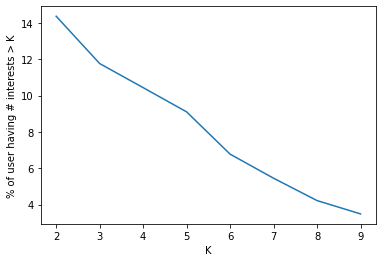

In [62]:
n_user = []
for k in range(2,10):
    n_user.append(np.sum(pivot.values.sum(axis=1) > k)/pivot.values.shape[0]*100)
plt.plot(range(2,10), n_user)
plt.xlabel('K')
plt.ylabel('% of user having # interests > K')

In [63]:
def get_model():
    N,M = len(users), len(interests)
    D = 16
    C = 32
    F = 16

    # User embedding
    user_id = Input(shape=[1], name='user_id_input')
    user_embbeding = Embedding(input_dim=N+1, output_dim=D, name='user_embedding_feature')(user_id)
    user_bias = Embedding(input_dim=N+1, output_dim=1, name='user_embedding_bias')(user_id)


    # Interest embedding
    interest_id = Input(shape=[1], name='interest_id_input')
    interest_embbeding = Embedding(input_dim=M+1, output_dim=2*D, name='interest_embedding_feature')(interest_id)
    interest_bias = Embedding(input_dim=M+1, output_dim=1, name='interest_embbeding_bias')(interest_id)


    # DNN Model
    user_pivot = Input(shape=[M], name="user_pivot_input")
    user_feature = Dense(F, name='user-feature1', activation='relu')(user_pivot) # shape: [B,D]
    user_feature = Dense(F, name='user-feature2', activation='relu')(user_feature) # shape: [B,D]
    user_dimred = Reshape(target_shape=(1,D))(Dense(D, name='user-dimred')(user_feature))
    user_flat = Flatten()(user_dimred)
    user_flat_bias = Dense(1)(user_flat)

    user_embbeding = concatenate([user_embbeding, user_dimred])
    user_bias = Average()([user_bias, user_flat_bias])
    # Embbeding Model
    user_interest_embbeding = Dot(axes=2, name='dot')([user_embbeding, interest_embbeding])
    user_interest_add = Add(name='add')([user_interest_embbeding, user_bias, interest_bias])
    user_interest_flat = Flatten(name='faltten')(user_interest_add)
    user_interest_emb_act = Activation('tanh')(user_interest_flat)



    model = Model(inputs = {'user_id': user_id, 'interest_id': interest_id, 'user_pivot': user_pivot}, outputs = {'preference': user_interest_emb_act})


    model.compile(
        optimizer='sgd',
        loss='mse'
    )
    return model

In [64]:
from sklearn.model_selection import KFold

In [65]:
kf = KFold(n_splits=4, shuffle=True)
batch_size = 64
K = 3
print_summary = True
for train_index, valid_index in tqdm(kf.split(indices)):
    print('spliting data:')
    user_k = np.where(pivot.values.sum(axis=1) > K)[0]
    np.random.shuffle(user_k)
    user_valid, interest_valid, preference_valid = data[valid_index,0], data[valid_index,1], data[valid_index,2]
    valid_generator = Generator(user_data=user_valid, interest_data=interest_valid, user_pivot=user_pivot, preference_data=preference_valid, batch_size=batch_size)
    interests_names = pivot.columns
    sample = 0; i = 0;
    test_dic = dict()
    for _ in tqdm(range(int(pivot.values.sum()*20/100/K))):
        if i >= len(user_k):
            print('there is not enough data with respect to K to take as test samples')
            break
        user_id = user_k[i]
        ind = np.where(pivot.values[user_id,:] > 0)[0]
        np.random.shuffle(ind)
        ind = ind[0:K]
        for j in ind:
            test_dic[(keys[user_id], le_interests.transform([interests_names[j]])[0])] = 1
        sample += K
        i += 1
        ind = np.where(pivot.values[user_id,:] == 0)[0]
        np.random.shuffle(ind)
        ind = ind[0:K]
        for j in ind:
            test_dic[(keys[user_id], le_interests.transform([interests_names[j]])[0])] = 0
    train_dic = dict()
    for key,val in data_dic.items():
        if key not in test_dic.keys():
            train_dic[key] = val
    train = np.array([[k[0],k[1],v] for k,v in train_dic.items()])
    test  = np.array([[k[0],k[1],v] for k,v in test_dic.items()])

    user_train, interest_train, preference_train = train[:,0], train[:,1], train[:,2]
    train_generator = Generator(user_data=user_train, interest_data=interest_train, user_pivot=user_pivot, preference_data=preference_train, batch_size=batch_size)

    user_test, interest_test, preference_test = test[:,0], test[:,1], test[:,2]
    test_generator = Generator(user_data=user_test, interest_data=interest_test, user_pivot=user_pivot, preference_data=preference_test, batch_size=batch_size)
    print('model training:')

    model = get_model()
    if print_summary:
        print(model.summary())
        plot_model(model)
        print_summary = False

    model.fit(train_generator, epochs=100, validation_data=valid_generator, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
    Pred = model.predict(test_generator)['preference']
    
    Results = []
    Performance = dict()
    for k in range(1,K+1):
        Performance[k] = []
    for i,p in enumerate(Pred):
        if (i%(2*K) == 0) & (i != 0):
            Results = sorted(Results, key=lambda x: x[0], reverse=True)
            # print(Results)
            bin = [x[1] for x in Results]
            # print(bin)
            for k in range(1,K+1):
                for b in range(k):
                    Performance[k].append(bin[b])
            # break
            Results = [[p[0], preference_test[i]]]
        else:
            Results.append([p[0], preference_test[i]])
    # break
    for k,v in Performance.items():
        print('k={}: Performance: {}'.format(k, np.mean(v)))

spliting data:


there is not enough data with respect to K to take as test samples
model training:
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_pivot_input (InputLayer)   [(None, 5923)]       0                                            
__________________________________________________________________________________________________
user-feature1 (Dense)           (None, 16)           94784       user_pivot_input[0][0]           
__________________________________________________________________________________________________
user-feature2 (Dense)           (None, 16)           272         user-feature1[0][0]              
__________________________________________________________________________________________________
user-dimred (Dense)             (None, 16)           272         user-feature2[0][0]              
____

there is not enough data with respect to K to take as test samples
model training:
Epoch 1/100
649/649 [==============================] - 5s 8ms/step - loss: 0.9671 - val_loss: 1.1979
Epoch 2/100
649/649 [==============================] - 5s 8ms/step - loss: 0.8918 - val_loss: 0.7340
Epoch 3/100
649/649 [==============================] - 5s 8ms/step - loss: 0.8197 - val_loss: 0.7437
Epoch 4/100
649/649 [==============================] - 5s 8ms/step - loss: 0.7487 - val_loss: 0.5346
Epoch 5/100
649/649 [==============================] - 5s 8ms/step - loss: 0.6690 - val_loss: 0.6746
Epoch 6/100
649/649 [==============================] - 5s 8ms/step - loss: 0.5738 - val_loss: 0.7928
Epoch 7/100
649/649 [==============================] - 5s 8ms/step - loss: 0.4643 - val_loss: 0.1413
Epoch 8/100
649/649 [==============================] - 5s 8ms/step - loss: 0.3658 - val_loss: 0.3960
Epoch 9/100
649/649 [==============================] - 5s 8ms/step - loss: 0.3065 - val_loss: 0.3757
Epoch 10

there is not enough data with respect to K to take as test samples
model training:
Epoch 1/100
650/650 [==============================] - 5s 8ms/step - loss: 0.9628 - val_loss: 1.1409
Epoch 2/100
650/650 [==============================] - 5s 8ms/step - loss: 0.8899 - val_loss: 1.0296
Epoch 3/100
650/650 [==============================] - 5s 8ms/step - loss: 0.8261 - val_loss: 0.8981
Epoch 4/100
650/650 [==============================] - 5s 8ms/step - loss: 0.7601 - val_loss: 1.0340
Epoch 5/100
650/650 [==============================] - 5s 8ms/step - loss: 0.7107 - val_loss: 0.2084
Epoch 6/100
650/650 [==============================] - 5s 8ms/step - loss: 0.6658 - val_loss: 0.6578
Epoch 7/100
650/650 [==============================] - 5s 8ms/step - loss: 0.6116 - val_loss: 0.4214
Epoch 8/100
650/650 [==============================] - 5s 8ms/step - loss: 0.5343 - val_loss: 0.3057
Epoch 9/100
650/650 [==============================] - 5s 8ms/step - loss: 0.4410 - val_loss: 0.4290
Epoch 10

there is not enough data with respect to K to take as test samples
model training:
Epoch 1/100
649/649 [==============================] - 5s 8ms/step - loss: 0.9783 - val_loss: 0.9248
Epoch 2/100
649/649 [==============================] - 5s 8ms/step - loss: 0.9185 - val_loss: 0.6366
Epoch 3/100
649/649 [==============================] - 5s 8ms/step - loss: 0.8607 - val_loss: 1.1519
Epoch 4/100
649/649 [==============================] - 5s 8ms/step - loss: 0.7899 - val_loss: 0.7755
Epoch 5/100
649/649 [==============================] - 5s 8ms/step - loss: 0.7227 - val_loss: 1.1400
Epoch 6/100
649/649 [==============================] - 5s 8ms/step - loss: 0.6612 - val_loss: 0.7718
Epoch 7/100
649/649 [==============================] - 5s 8ms/step - loss: 0.5839 - val_loss: 0.7179
Epoch 8/100
649/649 [==============================] - 5s 8ms/step - loss: 0.5078 - val_loss: 0.5009
Epoch 9/100
649/649 [==============================] - 5s 8ms/step - loss: 0.4134 - val_loss: 0.3166
Epoch 10